# 다중 분류
SGD 분류기, 랜덤 포레스트 분류기, 나이브 베이즈 분류기 같은 일부 알고리즘은<br>
여러 개의 클래스를 직접 처리할 수 있지만,<br>
로지스틱 회귀나 서포트 벡터 머신 분류기 같은 다른 알고리즘은 이진 분류만 가능합니다.<br>
하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많습니다.

예를 들어 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개를 훈련시켜서<br>
클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있습니다.<br>
이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 됩니다.<br>
이런 방식의 분류를 OvR(one-versus-the-rest) 전략이라고 합니다.(OvA, one-versus-all 이라고도 합니다.)

또 다른 전략은 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이<br>
숫자의 조합마다 이진 분류기를 훈련시키는 것입니다.<br>
이를 OvO(one-versus-one) 전략이라고 합니다.<br>
이 전략에서는 클래스가 N개라면 분류기는 \\( \frac{N(N - 1)}{2} \\)개가 필요합니다.<br>
이미지 하나를 분류하려면 \\( \frac{N(N - 1)}{2} \\)개의 분류기 모두를 통과시켜서<br>
가장 많이 양성으로 분류된 클래스를 선택합니다.<br>
이 전략의 주요 장점은 각 분류기의 훈련에<br>
전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것입니다.

서포트 벡터 머신같은 일부 알고리즘은 훈련 세트의 크기에 민감해서<br>
큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다<br>
작은 훈련 세트에서 많은 분류기를 훈련시키는 게 빠르므로 OvO를 선호합니다.

하지만 대부분의 이진 분류 알고리즘에서는 OvR을 선호합니다.

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면<br>
알고리즘이 자동으로 OvR 또는 OvO를 실행합니다.<br>
sklearn.svm.SVC 클래스를 이용해 서포트 벡터 머신 분류기를 살펴봅시다.

In [40]:
from sklearn.svm import SVC

In [41]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

내부에서 사이킷런이 OvO 전략을 사용해서 45개의 이진 분류기를 훈련시키고<br>
각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택합니다.

decision_function() 메소드를 호출하면 샘플 당 10개의 점수를 반환합니다.

In [42]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [43]:
np.argmax(some_digit_scores)

5

In [44]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
svm_clf.classes_[5]

5

가장 높은 점수가 클래스 5에 해당하는 값임을 알 수 있습니다.

사이킷런에서 OvO나 OvR을 사용하도록 강제하려면<br>
OneVsOneClassifier나 OneVsRestClassifier를 사용합니다.

간단하게 이진 분류기 인스턴스를 만들어서 전달해주면 됩니다.<br>
(심지어 이진 분류기일 필요도 없습니다.)

In [46]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

다중 분류를 위해서 그냥 SGDClassifier를 사용하는 것도 좋습니다.

SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에<br>

별도의 OvR이나 OvO를 적용할 필요가 없습니다.

In [47]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

위의 경우에서는 분류기가 숫자를 잘못 분류했습니다.<br>
5가 결과로 나와야 하는데 3이 결과로 나왔습니다.

decision_function() 메소드는 클래스마다 하나의 값을 반환합니다.<br>
각 점수를 확인해보겠습니다.

In [48]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

5에 그나마 다른 숫자들에 비해서는 높은 점수를 줬지만<br>
3에 비해서는 턱없이 작은 모습입니다.

이 분류기는 이 숫자를 꽤 높은 확률로 3으로 판단하고 있나봅니다.<br>
그럼 한 번 다른 이미지에 대해서 예측을 해보겠습니다.

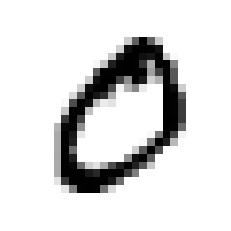

In [49]:
some_digit_2 = X[1]
some_digit_2_image = some_digit_2.reshape(28, 28)

plt.imshow(some_digit_2_image, cmap='binary')
plt.axis('off')
plt.show()

이번에 테스트해볼 이미지는 0입니다.<br>
이 이미지를 어떻게 예측하는지 한 번 보겠습니다.

In [50]:
sgd_clf.predict([some_digit_2])

array([0], dtype=uint8)

In [51]:
sgd_clf.decision_function([some_digit_2])

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

올바르게 0으로 예측하고 있고,<br>
다른 수들은 거의 의심도 하지 않는 모습을 보여줍니다.

이제 분류기를 평가해보겠습니다.

분류기 평가에는 일반적으로 교차 검증을 사용하므로<br>
cross_val_score()를 사용하겠습니다.

In [52]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

위에서 some_digit을 잘못 예측한 것은 유감이지만<br>
모든 테스트 폴드에서 높은 정확도를 보입니다.

랜덤 분류기를 사용했다면 10%의 정확도정도만 보였을테니<br>
꽤 괜찮은 성능을 보인다고 할 수 있겠습니다.

그렇지만 성능을 더 개선할 여지는 있습니다.<br>
예를 들어 입력의 스케일을 조정하면 정확도를 더 높일 수 있습니다.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')